In [191]:
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import glob

# EDA

## Loading

In [192]:
data = pd.read_pickle('../../data/tidy_data/Transactions_v1/Transactions.pkl')
data.head(1)

,Year,Month,House,Account Status,Premise,Chain,Customer ID,Customer,Beverage Type,Product Type,...,Product,Product ID,Metrics,STD. Cases,Size Liters,Case Bottles,Case Liters,Liters,Bottles,Transactions
0,2018,2018-11-01,ELP,Active,OFF,EMPLOYEES,730100375,"ALARCON, EDWARD C",SPIRITS,BOURBON,...,DEVILS RIVER SM BATCH TX BBN 6PK 750M,80848,NaN,2.0,0.75,12,9.0,18.0,24.0,1


# EDA

## Record counts 

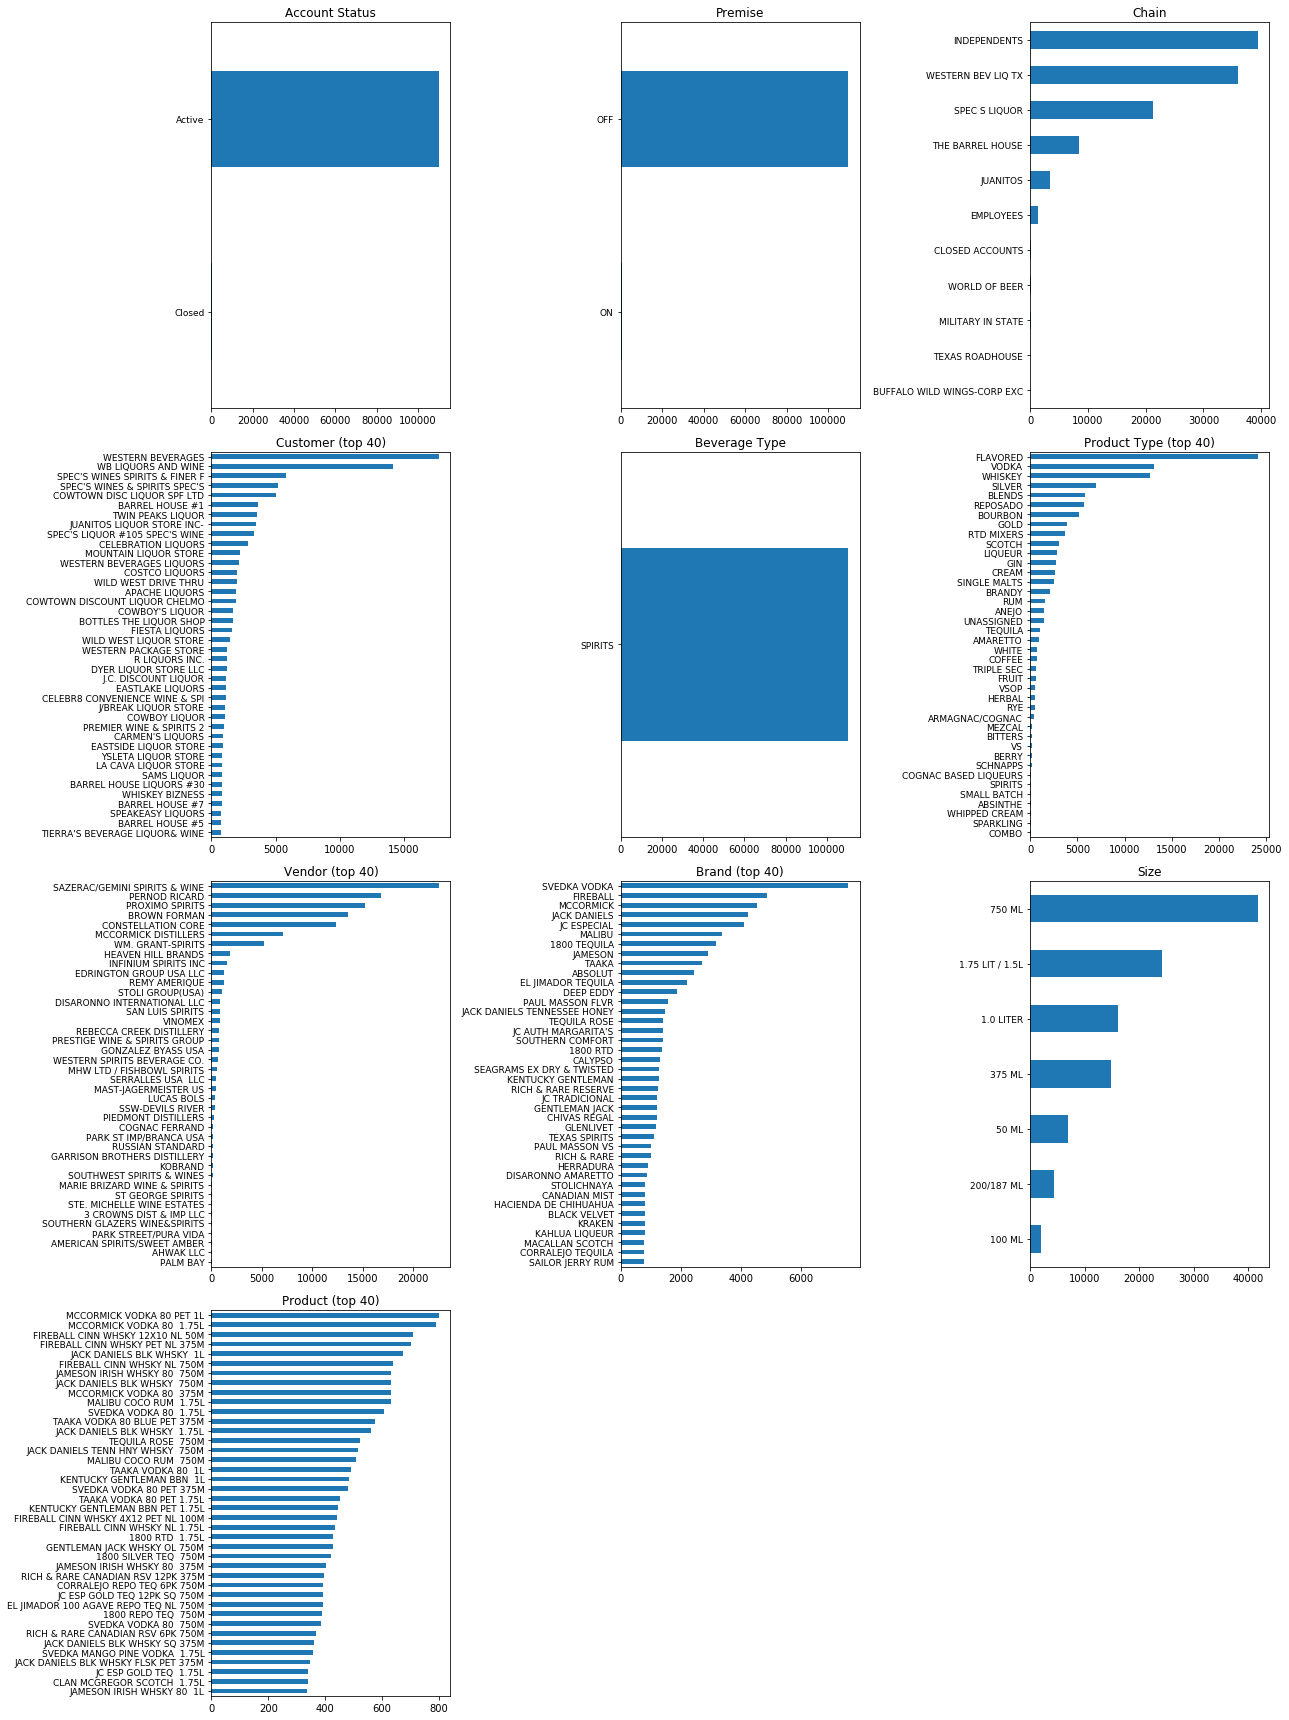

In [193]:
#cols = data.select_dtypes('object').columns
cols = ['Account Status','Premise','Chain','Customer','Beverage Type','Product Type','Vendor','Brand','Size','Product']
rows = math.ceil(len(cols)/3)
plt.figure(figsize=(18,6*rows))
maxOut = 40
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    v =  data[c].value_counts().sort_values(ascending=True)
    plt.title(c + (' (top ' + str(maxOut) + ')' if v.shape[0]>maxOut else '' ))
    plt.tick_params(axis='y',labelsize=9)
    v.tail(maxOut).plot(kind='barh')
plt.tight_layout()

## Distributions

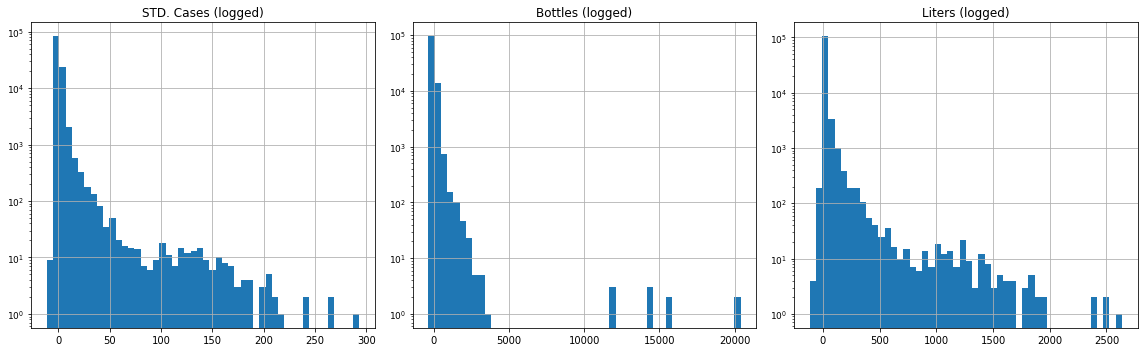

In [194]:
#cols = data.select_dtypes('object').columns
import seaborn as sns
cols = ['STD. Cases','Bottles','Liters']
rows = math.ceil(len(cols)/3)
plt.figure(figsize=(16,5*rows))
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    plt.title(c + ' (logged)')
    plt.tick_params(axis='y',labelsize=9)
    data[c].hist(bins=50)
    #sns.distplot(data[c],bins=50,kde=False)
    plt.yscale(value='log')
    
plt.tight_layout()

## Trends by Month

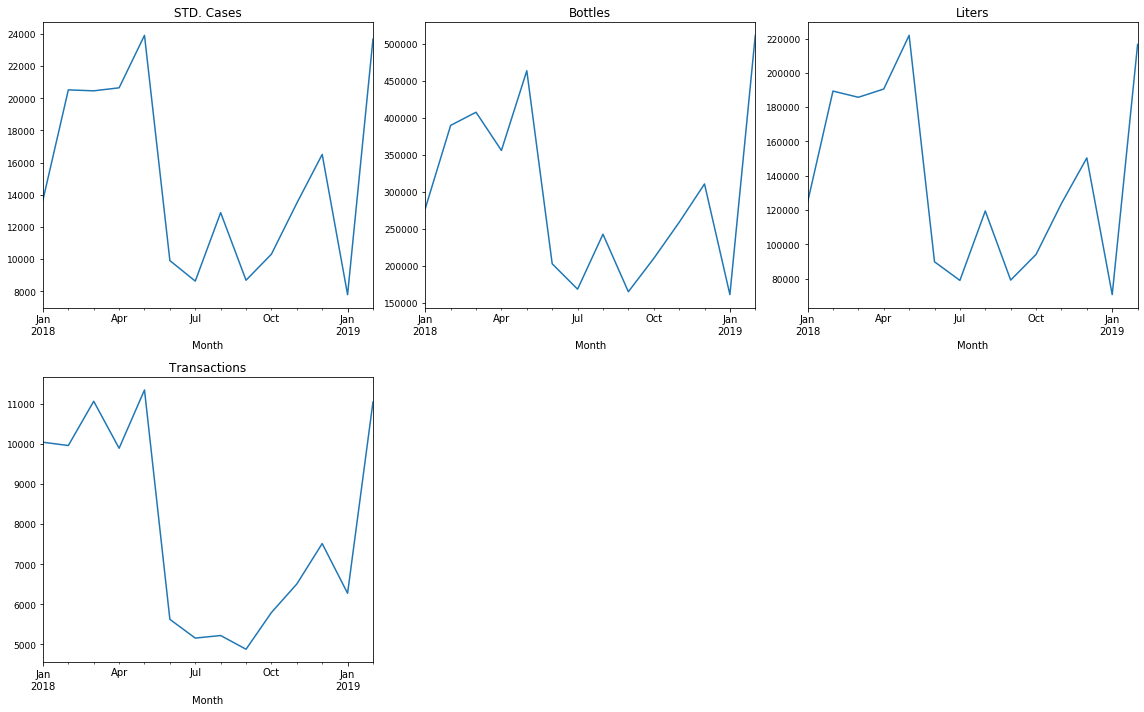

In [195]:
#cols = data.select_dtypes('object').columns
import seaborn as sns
cols = ['STD. Cases','Bottles','Liters','Transactions']
rows = math.ceil(len(cols)/3)
plt.figure(figsize=(16,5*rows))
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    plt.title(c)
    plt.tick_params(axis='y',labelsize=9)
    d=data.groupby(by='Month')[c].sum()
    d.plot()
plt.tight_layout()